Generowanie danych

C:\Users\Filip\AppData\Local\Temp\ipykernel_49480\1076196546.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(hearts[0], hearts[1], 'ro', color='red')
C:\Users\Filip\AppData\Local\Temp\ipykernel_49480\1076196546.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(rect[0], rect[1], 'ro', color='blue')


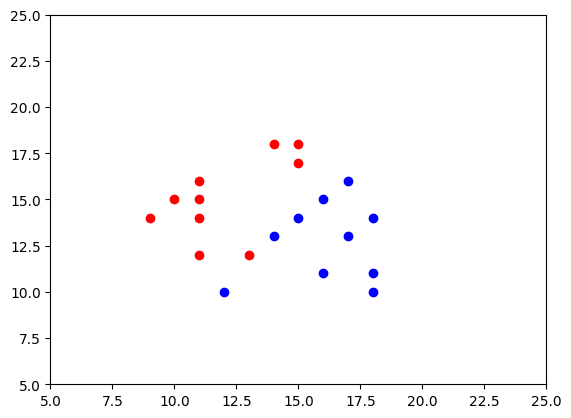

In [77]:
import random
import matplotlib.pyplot as plt

random.seed(2)
hearts = []
rect = []

for i in range(10):
    x1 = random.randint(-3, 3) + 12
    x2 = random.randint(-3, 3) + 15
    x3 = random.randint(-3, 3) + 15
    x4 = random.randint(-3, 3) + 13
    rect.append([x3, x4])
    hearts.append([x1, x2])

hearts = list(zip(*hearts))
rect = list(zip(*rect))
plt.plot(hearts[0], hearts[1], 'ro', color='red')
plt.plot(rect[0], rect[1], 'ro', color='blue')
plt.xlim(5, 25)
plt.ylim(5, 25)
plt.show()

Podejście chata gpt

Coefficients found: A = -0.23718515625897302, B = 0.17457245569503993, C = 0.9058943112775183


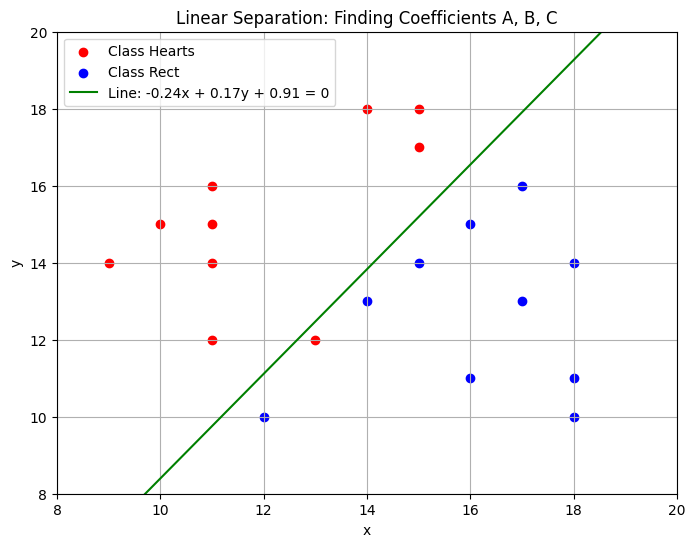

In [78]:
import numpy as np
hearts = np.array(hearts)
rect = np.array(rect)
# Combine all points into a single dataset
points = np.hstack((hearts, rect)).T  # Shape (n, 2), where n is the number of points
labels = np.array([1] * hearts.shape[1] + [-1] * rect.shape[1])  # Labels: +1 for hearts, -1 for rect

# Add a column of ones for the bias term C
X = np.hstack((points, np.ones((points.shape[0], 1))))  # Shape (n, 3)

# Use linear regression to find coefficients
w = np.linalg.lstsq(X, labels, rcond=None)[0]  # Solves for [A, B, C]

# Display the coefficients
A, B, C = w
print(f"Coefficients found: A = {A}, B = {B}, C = {C}")

# Plot the line and points
import matplotlib.pyplot as plt

x_vals = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
y_vals = -(A * x_vals + C) / B

plt.figure(figsize=(8, 6))
plt.scatter(hearts[0], hearts[1], color='red', label='Class Hearts')
plt.scatter(rect[0], rect[1], color='blue', label='Class Rect')
plt.plot(x_vals, y_vals, color='green', label=f'Line: {A:.2f}x + {B:.2f}y + {C:.2f} = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(8, 20)
plt.ylim(8, 20)
plt.title('Linear Separation: Finding Coefficients A, B, C')
plt.legend()
plt.grid(True)
plt.show()


Metoda z zajęc

Optymalne wartości: A = -0.20324889491654868, B = 0.20383257211487432, C = 0.0011871892351236221


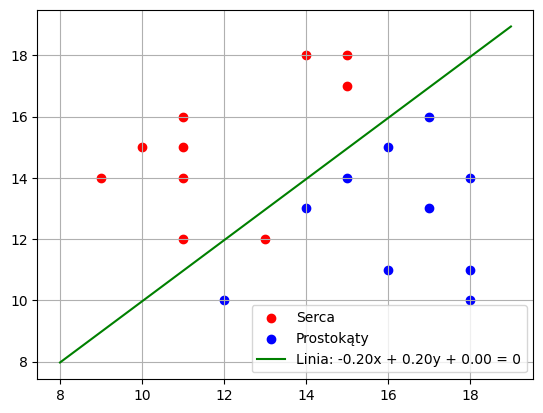

Punkt (1, 20) to serce.
Miara pewności: 97.92%
Punkt (14, 14) to serce.
Miara pewności: 0.93%


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

points = np.hstack((hearts, rect)).T  
labels = np.array([1] * hearts.shape[1] + [-1] * rect.shape[1]) 
X = np.hstack((points, labels.reshape(-1, 1))) 

def model(xi, A, B, C):
    return A * xi[0] + B * xi[1] + C

def f_kosztu(params, X):
    A, B, C = params
    suma = 0
    for i in range(len(X)):
        xi = X[i]
        yi = xi[-1]
        suma += abs(yi - model(xi, A, B, C))
    return 1 - suma / len(X)

def wizualizacja():
    x_vals = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
    y_vals = -(A * x_vals + C) / B

    plt.scatter(hearts[0], hearts[1], color='red', label='Serca')
    plt.scatter(rect[0], rect[1], color='blue', label='Prostokąty')

    y_vals_opt = -(A_opt * x_vals + C_opt) / B_opt
    plt.plot(x_vals, y_vals_opt, color='green', label=f'Linia: {A_opt:.2f}x + {B_opt:.2f}y + {C_opt:.2f} = 0')
    plt.legend()
    plt.grid(True)
    plt.show()

initial_guess = [0, 0, 0]
result = minimize(lambda params: -f_kosztu(params, X), initial_guess) 

A_opt, B_opt, C_opt = result.x
print(f"Optymalne wartości: A = {A_opt}, B = {B_opt}, C = {C_opt}")
wizualizacja()

# log(p/(1-p)) = U
# p/(1-p) = exp(U)
# p = exp(U) / (1 + exp(U))
# p/(1-p) = exp(U)

def probability(x0):
    U = model(x0, A_opt, B_opt, C_opt)
    # return np.exp(U) / (1 + np.exp(U)) 
    return 1 - np.exp(-U)


x_tests = [np.array([1, 20, None]), np.array([14, 14, None])]
for x_test in x_tests:
    prob = probability(x_test)
    if model(x_test, A_opt, B_opt, C_opt) > 0:
        print(f"Punkt ({x_test[0]}, {x_test[1]}) to serce.")
        print(f"Miara pewności: {prob * 100:.2f}%")
    else:
        print(f"Punkt ({x_test[0]}, {x_test[1]}) to prostokąt.")
        print(f"Miara pewności: {prob * 100:.2f}%")